In [1]:
### dependecies ###
import pandas as pd 
import numpy as np
import data_preparation as dp
import os
import matplotlib.pyplot as plt

In [2]:
# Probleme mit Blinks
#  z.B. bei VP2 gibt es keine Blinks in video 1,2,8,9,11,12,13

In [3]:
#one participants

# 1. look at whole dataframe and count the blinks per video
def count_blinks_whole_data(df_use):
    
    df_groups_sti_cat = df_use.groupby(["Stimulus", "Category"]) 
    return df_groups_sti_cat.count()["Trial"][:, "Blink"]

In [4]:
# 2. count blinks with a threshold per video
def count_blinks_theshold(df_use):
    df_left_eye =  dp.df_prepare_eye_tracking_data(df_use)[0]
    df_groups_sti_cat_left_eye = df_left_eye.groupby(["Stimulus", "Category"]) 
    return df_groups_sti_cat_left_eye.count()["Trial"][:, "Blink"]

In [5]:
# 3. count blinks in the last 10 seconds per video
def count_blinks_last_10_sek(df_use):
    df_10_sec_of_videos = dp.cut_last_10sec_of_videos(df_use)
    df_groups_sti_cat_last_10sec = df_10_sec_of_videos.groupby(["Stimulus", "Category"]) 
    return df_groups_sti_cat_last_10sec.count()["Trial"][:, "Blink"]

In [6]:
# 4. count blinks in last 10 seconds and with threshold per video
def count_blink_in_10sek_threshold(df_use):
    data = dp.df_prepare_eye_tracking_data(df_use)[0]
    df_10_sec_of_videos_threshold = dp.cut_last_10sec_of_videos(data)
    df_groups_sti_cat_last_10sec_threshold = df_10_sec_of_videos_threshold.groupby(["Stimulus", "Category"]) 
    return df_groups_sti_cat_last_10sec_threshold.count()["Trial"][:, "Blink"]

In [87]:
df_use = dp.read_data("Event Statistics - Single - 04.txt")
final = pd.DataFrame()
final["whole"] = count_blinks_whole_data(df_use).loc["vid1":"vid9"]
final["threshold"] =  count_blinks_theshold(df_use).loc["vid1":"vid9"]
final["last_10_sek"] = count_blinks_last_10_sek(df_use).loc["vid1":"vid9"]
final["threshold_last_secs"] = count_blink_in_10sek_threshold(df_use).loc["vid1":"vid9"]
final

c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


          Trial  Trial Start Raw Time [ms] Trial Start Time of Day [h:m:s:ms]  \
0      Trial001                 112387.977                       09:50:00:790   
1      Trial001                 112387.977                       09:50:00:790   
2      Trial001                 112387.977                       09:50:00:790   
3      Trial001                 112387.977                       09:50:00:790   
4      Trial001                 112387.977                       09:50:00:790   
...         ...                        ...                                ...   
39955  Trial112                5322848.576                       11:16:51:251   
39956  Trial112                5322848.576                       11:16:51:251   
39958  Trial112                5322848.576                       11:16:51:251   
39961  Trial112                5322848.576                       11:16:51:251   
39962  Trial112                5322848.576                       11:16:51:251   

      Stimulus  Export Star

,whole,threshold,last_10_sek,threshold_last_secs
Stimulus,,,,
vid1,42,12,NaN,NaN
vid10,91,28,3.0,2.0
vid11,41,16,2.0,1.0
vid12,81,32,4.0,2.0
vid13,67,28,3.0,1.0
vid14,77,30,2.0,1.0
vid15,59,28,4.0,2.0
vid16,15,8,NaN,NaN
vid2,50,17,3.0,1.0


<AxesSubplot: xlabel='Stimulus'>

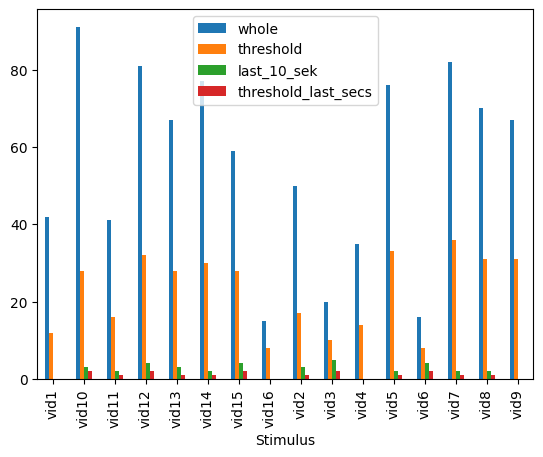

In [89]:
final.plot(kind = "bar")


In [65]:
df = dp.read_data("Event Statistics - Single - 01.txt")
df_use = dp.drop_unused_columns(df)



#13 vid15 fehlt
final = pd.DataFrame()
final["whole"] = count_blinks_whole_data(df_use).loc["vid1":"vid9"]
final["threshold"] =  count_blinks_theshold(df_use).loc["vid1":"vid9"]
final["last_10_sek"] = count_blinks_last_10_sek(df_use).loc["vid1":"vid9"]
final["threshold_last_secs"] = count_blink_in_10sek_threshold(df_use).loc["vid1":"vid9"]
final

c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


          Trial Stimulus  Export End Trial Time [ms]  Participant  \
0      Trial001  welcome                   30834.445            1   
1      Trial001  welcome                   30834.445            1   
2      Trial001  welcome                   30834.445            1   
3      Trial001  welcome                   30834.445            1   
4      Trial001  welcome                   30834.445            1   
...         ...      ...                         ...          ...   
53835  Trial112     ende                   13408.796            1   
53836  Trial112     ende                   13408.796            1   
53837  Trial112     ende                   13408.796            1   
53838  Trial112     ende                   13408.796            1   
53839  Trial112     ende                   13408.796            1   

       Tracking Ratio [%]   Category Eye L/R  Event Start Trial Time [ms]  \
0                  67.107  Separator     NaN                        0.000   
1                

,whole,threshold,last_10_sek,threshold_last_secs
Stimulus,,,,
vid1,306,152,14.0,7.0
vid10,350,164,12.0,6.0
vid11,141,67,9.0,3.0
vid12,390,200,11.0,4.0
vid13,241,117,14.0,7.0
vid14,275,134,16.0,8.0
vid15,330,142,26.0,8.0
vid16,78,36,NaN,NaN
vid2,326,154,15.0,7.0


In [60]:
df = dp.read_data("Event Statistics - Single - 04.txt")
df_use = dp.drop_unused_columns(df)



#13 vid15 fehlt
final = pd.DataFrame()
final["whole"] = count_blinks_whole_data(df_use).loc["vid1":"vid9"]
final["threshold"] =  count_blinks_theshold(df_use).loc["vid1":"vid9"]
final["last_10_sek"] = count_blinks_last_10_sek(df_use).loc["vid1":"vid9"]
final["threshold_last_secs"] = count_blink_in_10sek_threshold(df_use).loc["vid1":"vid9"]
final

c:\Users\Julia\BA-Mind-Wandering-my-Version\data_preparation.py:30: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(


          Trial Stimulus  Export End Trial Time [ms] Participant  \
0      Trial001  welcome                   15066.203         P04   
1      Trial001  welcome                   15066.203         P04   
2      Trial001  welcome                   15066.203         P04   
3      Trial001  welcome                   15066.203         P04   
4      Trial001  welcome                   15066.203         P04   
...         ...      ...                         ...         ...   
39955  Trial112     ende                   16311.918         P04   
39956  Trial112     ende                   16311.918         P04   
39958  Trial112     ende                   16311.918         P04   
39961  Trial112     ende                   16311.918         P04   
39962  Trial112     ende                   16311.918         P04   

       Tracking Ratio [%]   Category Eye L/R  Event Start Trial Time [ms]  \
0                  58.542  Separator     NaN                        0.000   
1                  58.542   F

,whole,threshold,last_10_sek,threshold_last_secs
Stimulus,,,,
vid1,42,12,NaN,NaN
vid10,91,28,3.0,2.0
vid11,41,16,2.0,1.0
vid12,81,32,4.0,2.0
vid13,67,28,3.0,1.0
vid14,77,30,2.0,1.0
vid15,59,28,4.0,2.0
vid16,15,8,NaN,NaN
vid2,50,17,3.0,1.0


In [ ]:
count_blink_in_10sek_threshold(df_use)

In [9]:
# alle blinks für alle videos

# plots 

In [ ]:
# blinks_left_eye_all_participants = pd.DataFrame()
# df_summary_statistic_right_eye_all_participants = pd.DataFrame()

# #list = [f'{i:>02}' for i in [1,3,4,5,6,7,9,10]]
# list = [f'{i:>02}' for i in [1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 
#    5, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,48, 51, 55,57,58,60, 62,64,65,66,67,69,72, 73,74,75,76,77,78,79,80,81, 84,85,86,88,90,91,92,95]]
# #navigate to directory
# os.chdir("C:/Users/Julia/Desktop/Daten-BA/SMI_Eventstatistics") 
# #get all files in directory
# list = os.listdir() 
# # remove participants
# list.remove("Event Statistics - Single - 82.txt")
# for filename in list:
#     print(filename)
#     # input: filename # output: dataframe to work on
#     df = dp.read_data(filename)
#     df_use = dp.drop_unused_columns(df)
#     df_blinks = pd.DataFrame()
    
#     df_blinks["Blink Number whole dataframe"] = count_blinks_whole_data(df_use)
#     df_blinks["Blink Number with threshold"] = count_blinks_last_10_sek(df_use)
#     df_blinks["Blinks of last 10 sec per video and threshold"] = count_blink_in_10sek_threshold(df_use)
#     blinks_left_eye_all_participants = pd.concat([blinks_left_eye_all_participants, df_blinks])
#     #df_summary_statistic_right_eye_all_participants = pd.concat([df_summary_statistic_right_eye_all_participants, df_summary_statistics_right_eye])

# blinks_left_eye_all_participants

In [ ]:
os.chdir("C:/Users/Julia/Desktop/Daten-BA/SMI_Eventstatistics") 
 #get all files in directory
list = os.listdir() 
 # remove participants
list.remove("Event Statistics - Single - 82.txt")
blinks_left_eye_all_participants = pd.DataFrame()
for filename in list:
    print(filename)
    # input: filename # output: dataframe to work on
    df = dp.read_data(filename)
    df_use = dp.drop_unused_columns(df)
    df_blinks = pd.DataFrame(index = ["vid1","vid10","vid11","vid12","vid13","vid14","vid15", "vid16","vid2","vid3","vid4","vid5","vid6","vid7","vid8","vid9"])
    
    df_blinks["Blink Number whole dataframe"] = count_blinks_whole_data(df_use).loc["vid1":"vid9"]
    df_blinks["Blink Number with threshold"] =  count_blinks_theshold(df_use).loc["vid1":"vid9"]
    df_blinks["Blink Number last 10 sec"] = count_blinks_last_10_sek(df_use).loc["vid1":"vid9"]
    df_blinks["Blinks of last 10 sec per video and threshold"] = count_blink_in_10sek_threshold(df_use).loc["vid1":"vid9"]
    df_blinks["Participant"] = [df.loc[:,"Participant"].values[0]] * 16
    df_blinks["Stimulus"] = ["vid1","vid10","vid11","vid12","vid13","vid14","vid15", "vid16","vid2","vid3","vid4","vid5","vid6","vid7","vid8","vid9"]
    
    blinks_left_eye_all_participants = pd.concat([blinks_left_eye_all_participants, df_blinks])
blinks_left_eye_all_participants

In [13]:
blinks_left_eye_all_participants

,Blink Number whole dataframe,Blink Number with threshold,Blink Number last 10 sec,Blinks of last 10 sec per video and threshold,Participant
vid1,306.0,152.0,14.0,7.0,1
vid10,350.0,164.0,12.0,6.0,1
vid11,141.0,67.0,9.0,3.0,1
vid12,390.0,200.0,11.0,4.0,1
vid13,241.0,117.0,14.0,7.0,1
...,...,...,...,...,...
vid5,124.0,51.0,6.0,3.0,97
vid6,31.0,13.0,4.0,2.0,97
vid7,205.0,79.0,10.0,5.0,97
vid8,92.0,35.0,2.0,1.0,97


C:\Users\Julia\AppData\Local\Temp\ipykernel_33236\3481771730.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  blinks_left_eye_all_participants.groupby("Stimulus").mean().plot(kind = "bar", title = "Mean Blink Number per Video")


<AxesSubplot: title={'center': 'Mean Blink Number per Video'}, xlabel='Stimulus'>

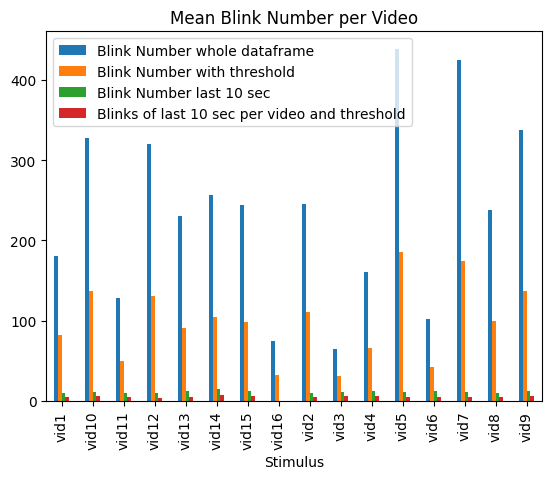

In [72]:
blinks_left_eye_all_participants.groupby("Stimulus").mean().plot(kind = "bar", title = "Mean Blink Number per Video")

C:\Users\Julia\AppData\Local\Temp\ipykernel_33236\1028639504.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  blinks_left_eye_all_participants.groupby("Stimulus").mean()[["Blink Number last 10 sec", "Blinks of last 10 sec per video and threshold"]].plot(kind = "bar", title = "Mean Blink Number per Video")


<AxesSubplot: title={'center': 'Mean Blink Number per Video'}, xlabel='Stimulus'>

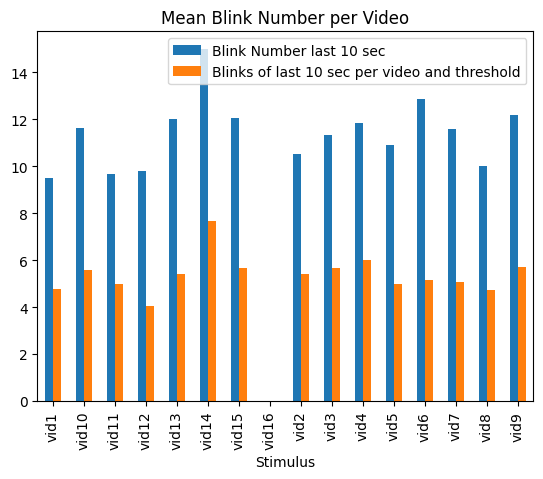

In [73]:
blinks_left_eye_all_participants.groupby("Stimulus").mean()[["Blink Number last 10 sec", "Blinks of last 10 sec per video and threshold"]].plot(kind = "bar", title = "Mean Blink Number per Video")

In [14]:
blinks_left_eye_all_participants.loc[(blinks_left_eye_all_participants["Participant"] == 1) & (blinks_left_eye_all_participants.index == "vid1"), 
["Blink Number whole dataframe", "Blink Number with threshold", "Blink Number last 10 sec","Blinks of last 10 sec per video and threshold"]].values

array([[306., 152.,  14.,   7.]])

<AxesSubplot: title={'center': 'blinks of participant 1 and Video 1'}>

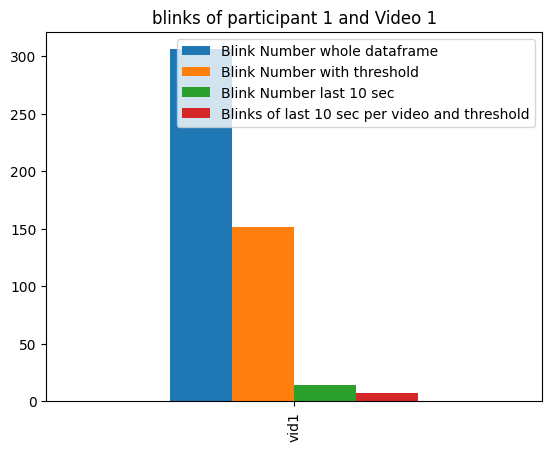

In [15]:
blinks_left_eye_all_participants.loc[(blinks_left_eye_all_participants["Participant"] == 1) & (blinks_left_eye_all_participants.index == "vid1"), 
["Blink Number whole dataframe", "Blink Number with threshold", "Blink Number last 10 sec","Blinks of last 10 sec per video and threshold"]].plot(kind = "bar", title = "blinks of participant " + 
str(blinks_left_eye_all_participants["Participant"].values[0]) + " and Video 1")

Text(0.5, 1.0, 'Blink Number of Participant 1')

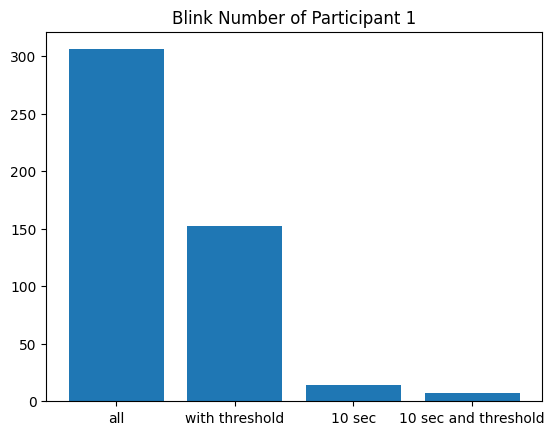

In [16]:
blinks = ["all", "with threshold", "10 sec","10 sec and threshold"]
data = blinks_left_eye_all_participants.loc[(blinks_left_eye_all_participants["Participant"] == 1) & (blinks_left_eye_all_participants.index == "vid1"), 
["Blink Number whole dataframe", "Blink Number with threshold", "Blink Number last 10 sec","Blinks of last 10 sec per video and threshold"]].values[0]
plt.bar(x = blinks, height = data)
plt.title("Blink Number of Participant 1")
#fig, ax = plt.subplots()
#bars = ax.barh(indexes, values)
#plt.Axes.bar_label(,data)
#plt.ax.bar_label(data)
#ax.bar_label(data)

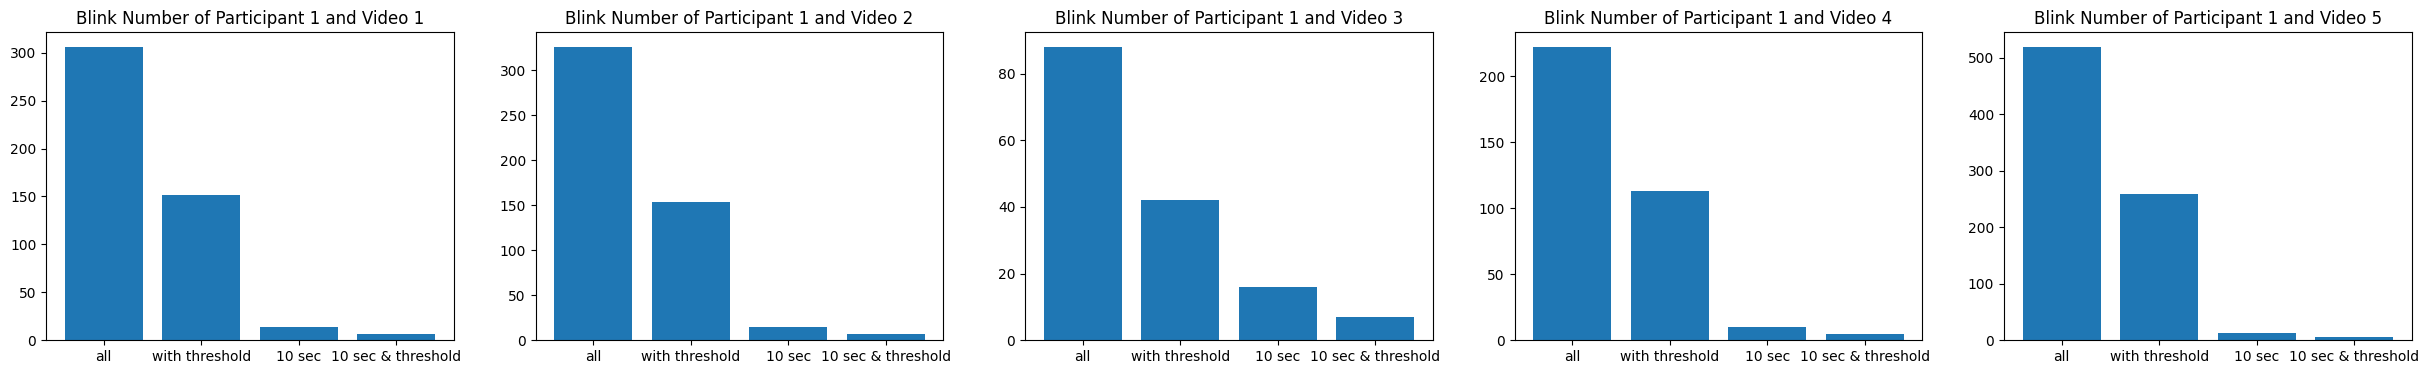

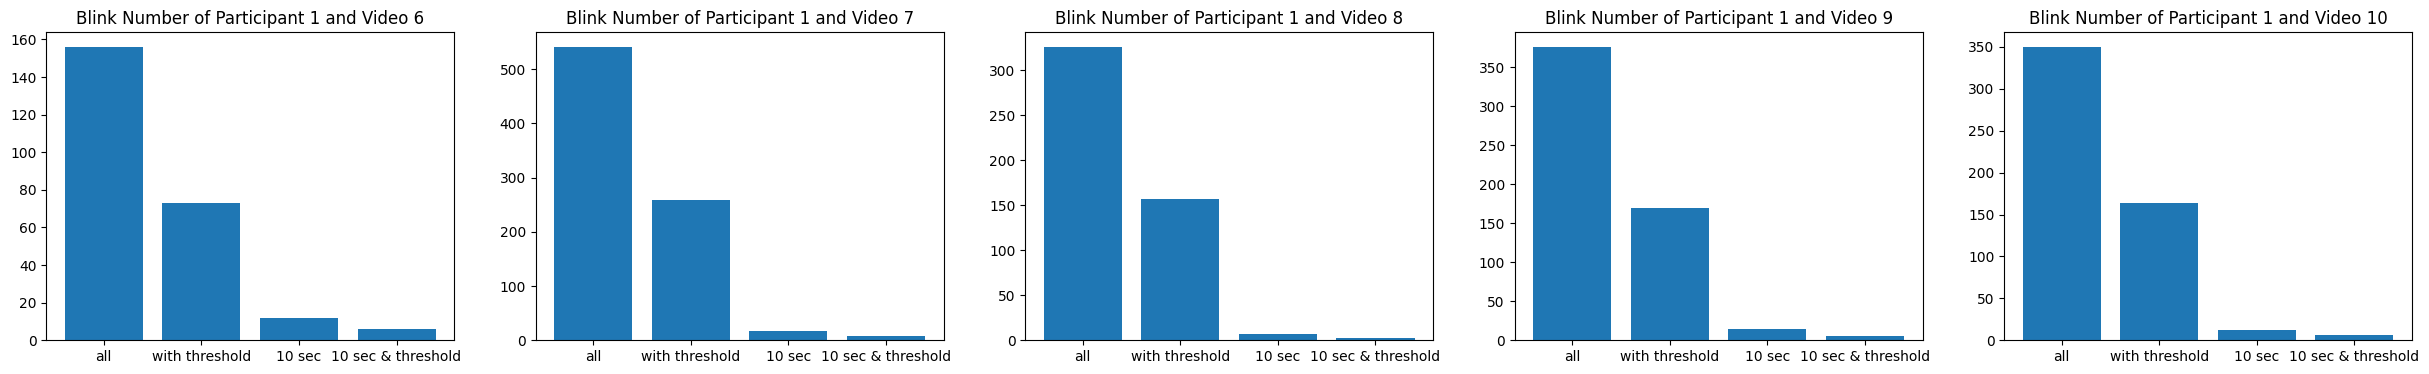

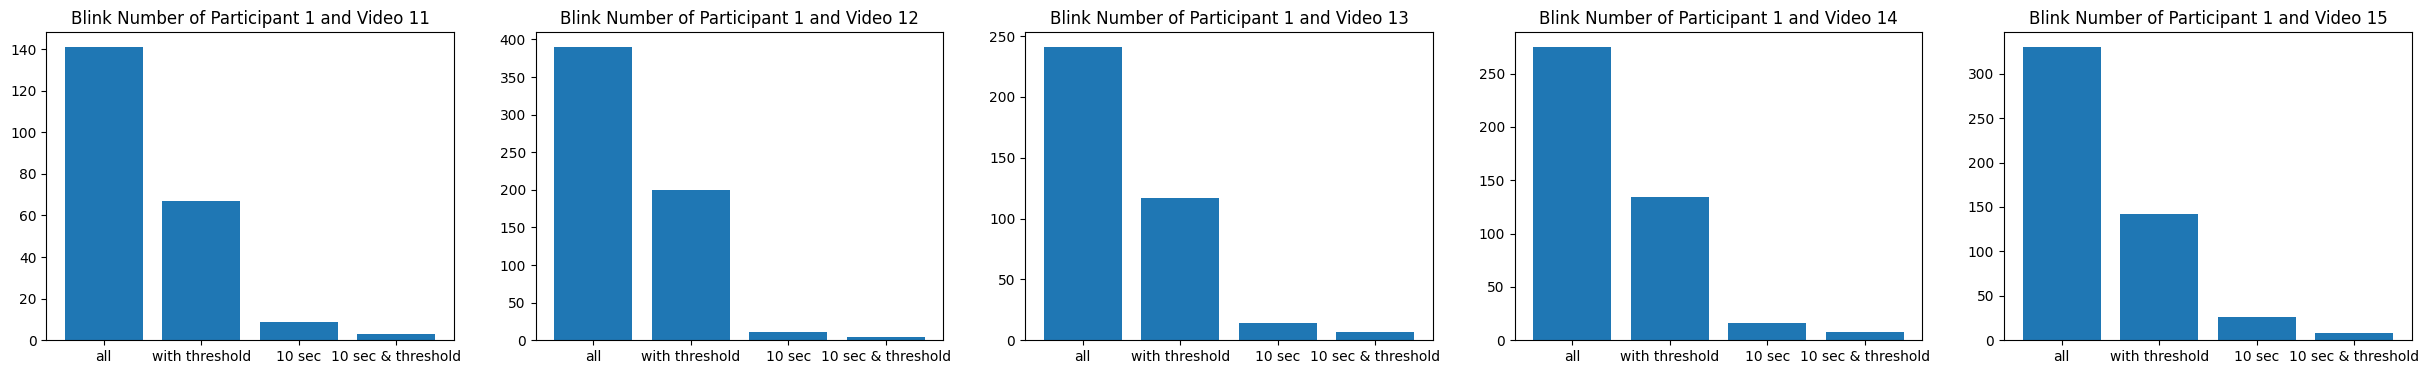

In [17]:
### Versuchsperson 1
plt.figure(1, figsize=(100,4))
for i in range(1,6):
    plt.subplot(1,16,i)
    blinks = ["all", "with threshold", "10 sec","10 sec & threshold"]
    data = blinks_left_eye_all_participants.loc[(blinks_left_eye_all_participants["Participant"] == 1) & (blinks_left_eye_all_participants.index == "vid" + str(i)), 
    ["Blink Number whole dataframe", "Blink Number with threshold", "Blink Number last 10 sec","Blinks of last 10 sec per video and threshold"]].values[0]
    plt.bar(x = blinks, height = data)
    plt.title("Blink Number of Participant 1 and Video " + str(i))

plt.show()
plt.figure(1, figsize=(100,4))
for i in range(6,11):
    plt.subplot(1,16,i)
    blinks = ["all", "with threshold", "10 sec","10 sec & threshold"]
    data = blinks_left_eye_all_participants.loc[(blinks_left_eye_all_participants["Participant"] == 1) & (blinks_left_eye_all_participants.index == "vid" + str(i)), 
    ["Blink Number whole dataframe", "Blink Number with threshold", "Blink Number last 10 sec","Blinks of last 10 sec per video and threshold"]].values[0]
    plt.bar(x = blinks, height = data)
    plt.title("Blink Number of Participant 1 and Video " + str(i))

plt.show()

plt.figure(1, figsize=(100,4))
for i in range(11,16):
    plt.subplot(1,16,i)
    blinks = ["all", "with threshold", "10 sec","10 sec & threshold"]
    data = blinks_left_eye_all_participants.loc[(blinks_left_eye_all_participants["Participant"] == 1) & (blinks_left_eye_all_participants.index == "vid" + str(i)), 
    ["Blink Number whole dataframe", "Blink Number with threshold", "Blink Number last 10 sec","Blinks of last 10 sec per video and threshold"]].values[0]
    plt.bar(x = blinks, height = data)
    plt.title("Blink Number of Participant 1 and Video " + str(i))
plt.show()

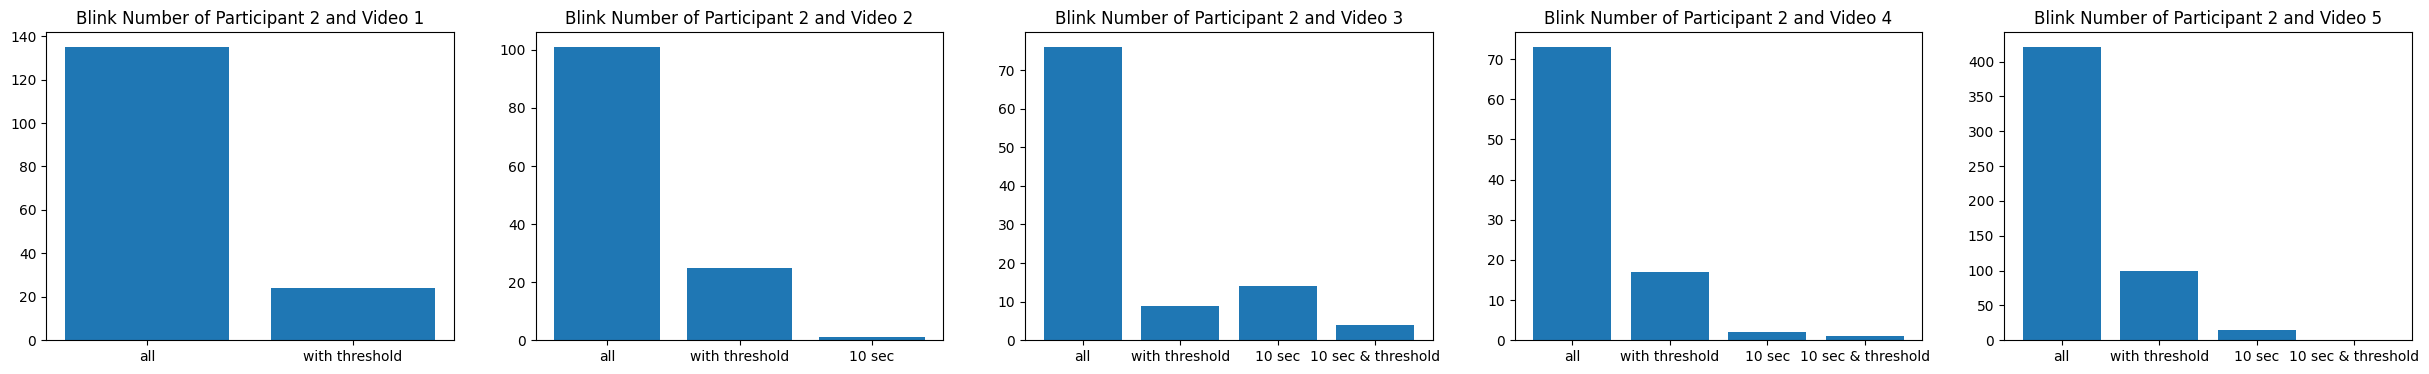

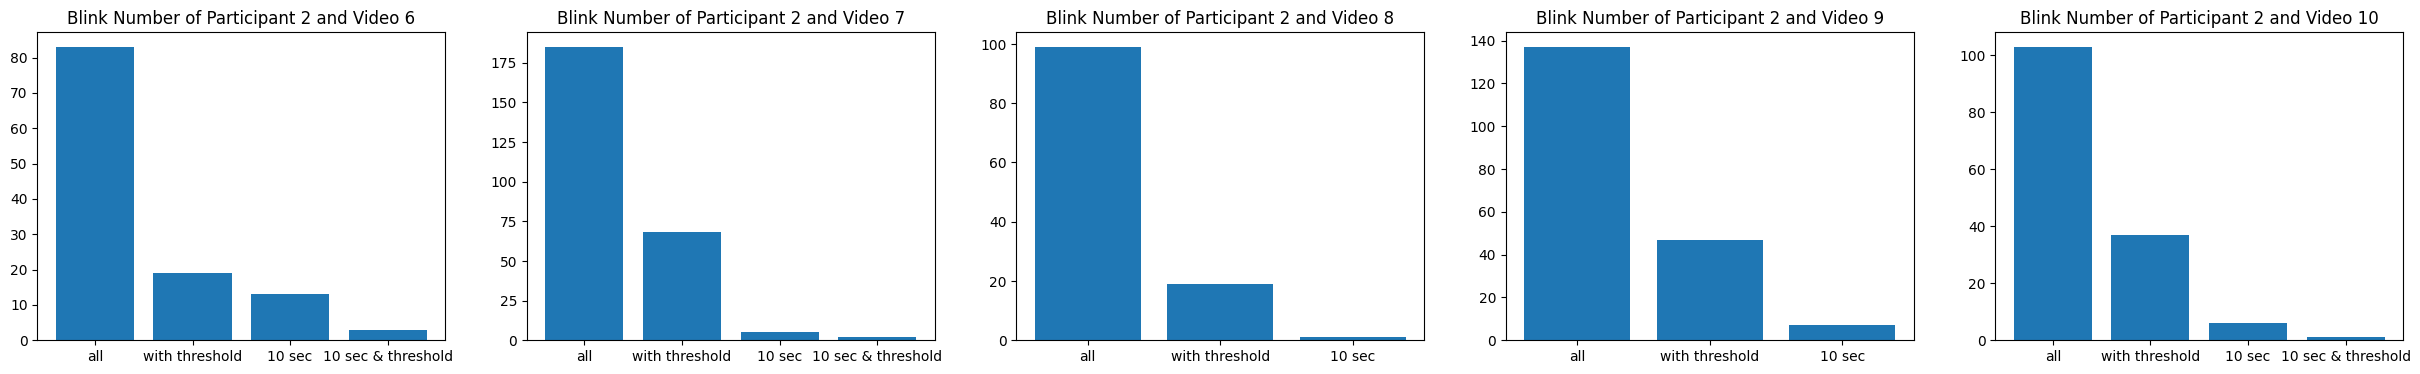

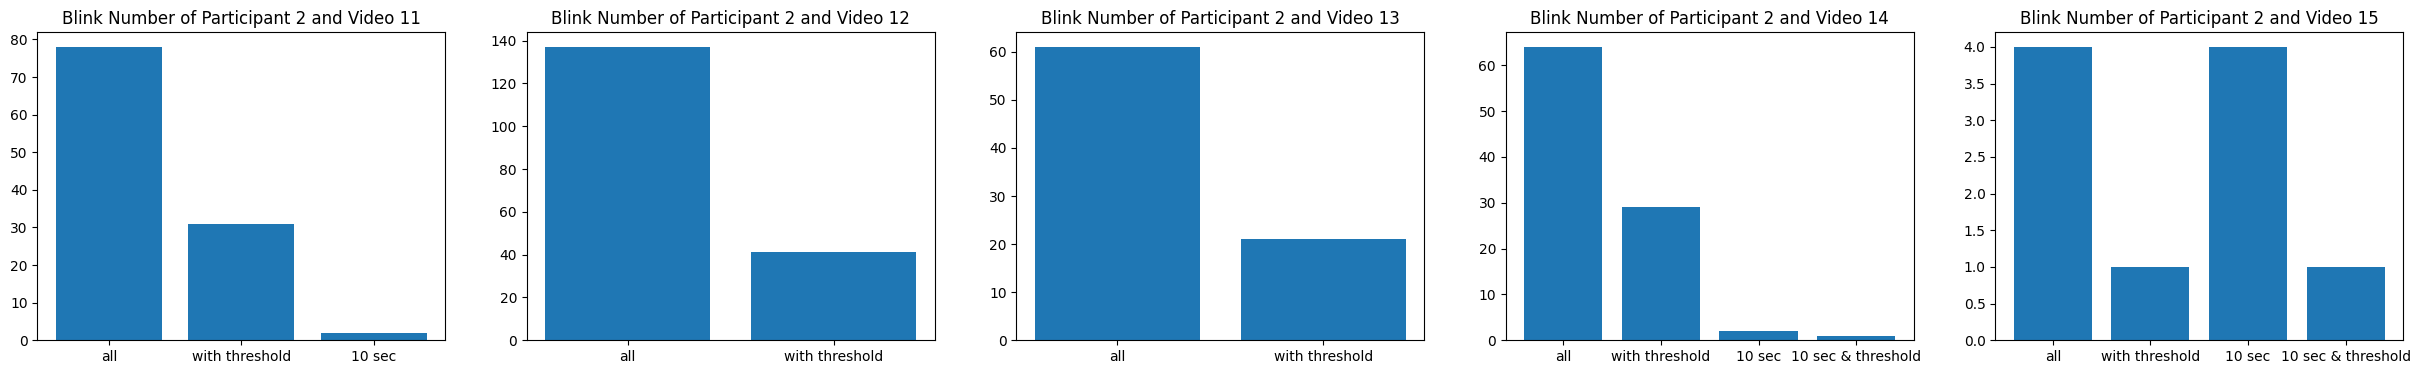

In [18]:
### Versuchsperson 2
plt.figure(1, figsize=(100,4))
for i in range(1,6):
    plt.subplot(1,16,i)
    blinks = ["all", "with threshold", "10 sec","10 sec & threshold"]
    data = blinks_left_eye_all_participants.loc[(blinks_left_eye_all_participants["Participant"] == 2) & (blinks_left_eye_all_participants.index == "vid" + str(i)), 
    ["Blink Number whole dataframe", "Blink Number with threshold", "Blink Number last 10 sec","Blinks of last 10 sec per video and threshold"]].values[0]
    plt.bar(x = blinks, height = data)
    plt.title("Blink Number of Participant 2 and Video " + str(i))

plt.show()
plt.figure(1, figsize=(100,4))
for i in range(6,11):
    plt.subplot(1,16,i)
    blinks = ["all", "with threshold", "10 sec","10 sec & threshold"]
    data = blinks_left_eye_all_participants.loc[(blinks_left_eye_all_participants["Participant"] == 2) & (blinks_left_eye_all_participants.index == "vid" + str(i)), 
    ["Blink Number whole dataframe", "Blink Number with threshold", "Blink Number last 10 sec","Blinks of last 10 sec per video and threshold"]].values[0]
    plt.bar(x = blinks, height = data)
    plt.title("Blink Number of Participant 2 and Video " + str(i))

plt.show()

plt.figure(1, figsize=(100,4))
for i in range(11,16):
    plt.subplot(1,16,i)
    blinks = ["all", "with threshold", "10 sec","10 sec & threshold"]
    data = blinks_left_eye_all_participants.loc[(blinks_left_eye_all_participants["Participant"] == 2) & (blinks_left_eye_all_participants.index == "vid" + str(i)), 
    ["Blink Number whole dataframe", "Blink Number with threshold", "Blink Number last 10 sec","Blinks of last 10 sec per video and threshold"]].values[0]
    plt.bar(x = blinks, height = data)
    plt.title("Blink Number of Participant 2 and Video " + str(i))
plt.show()

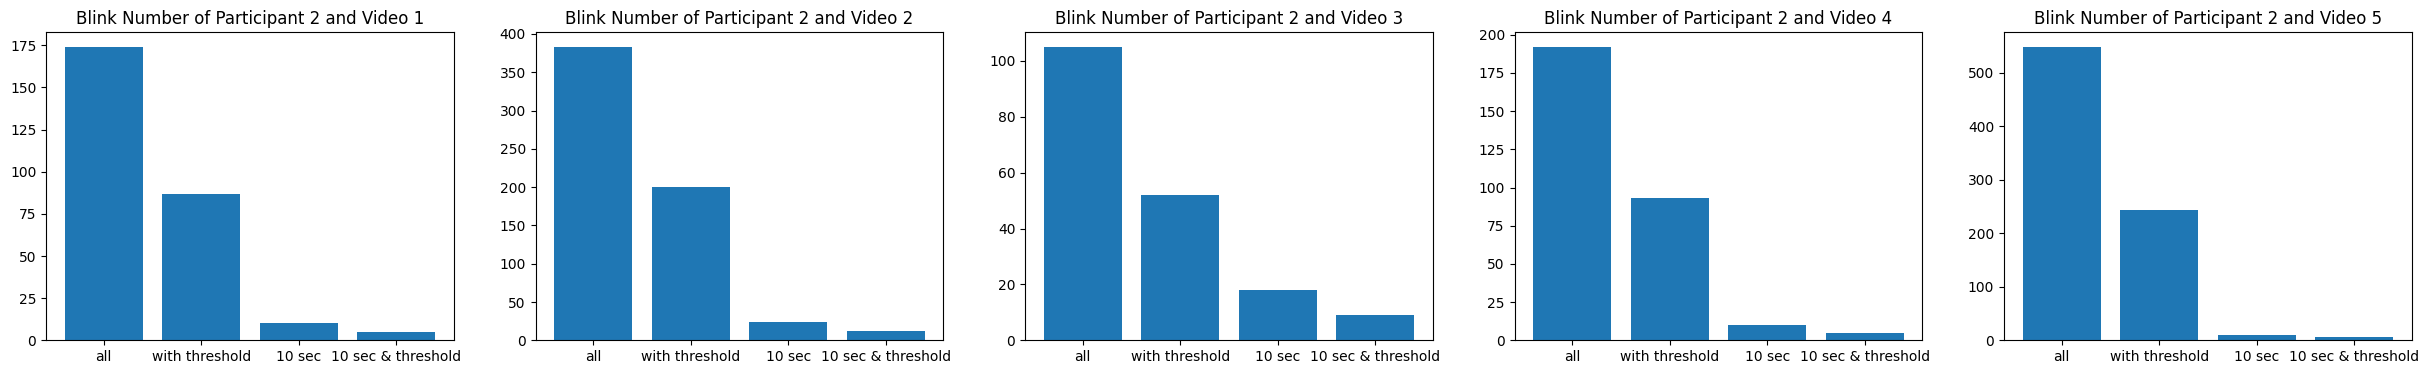

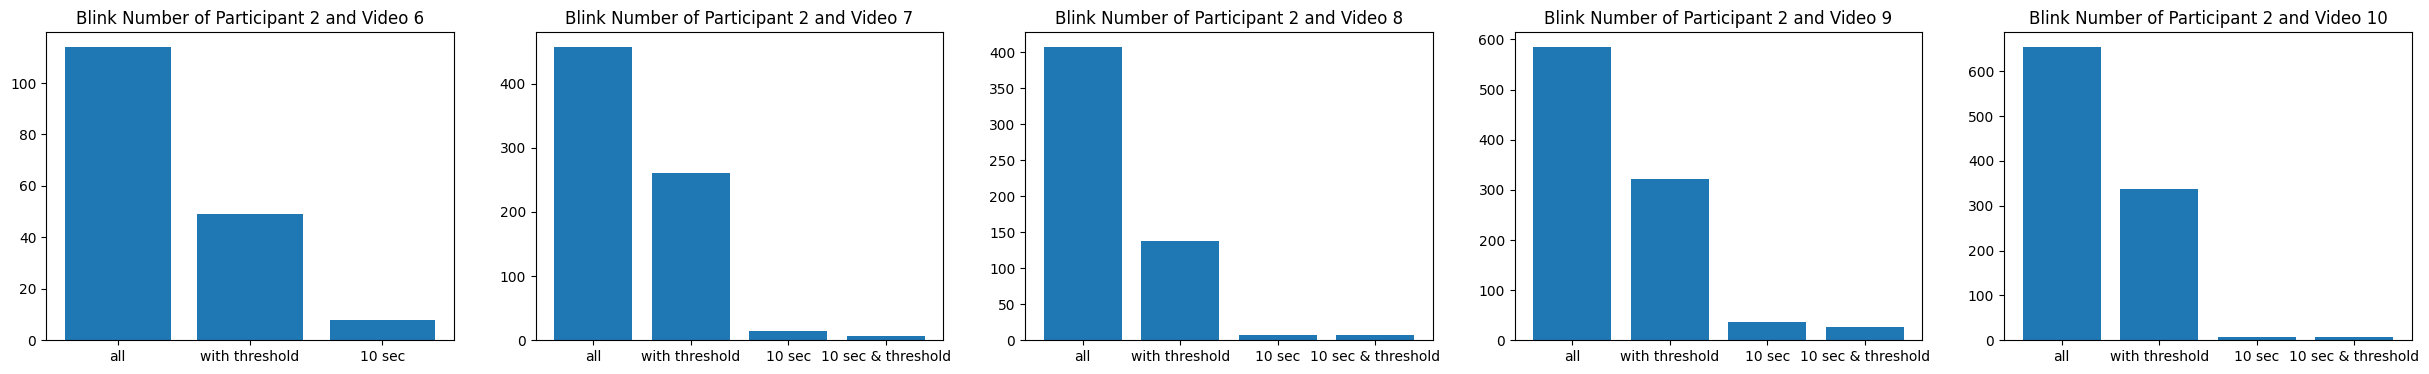

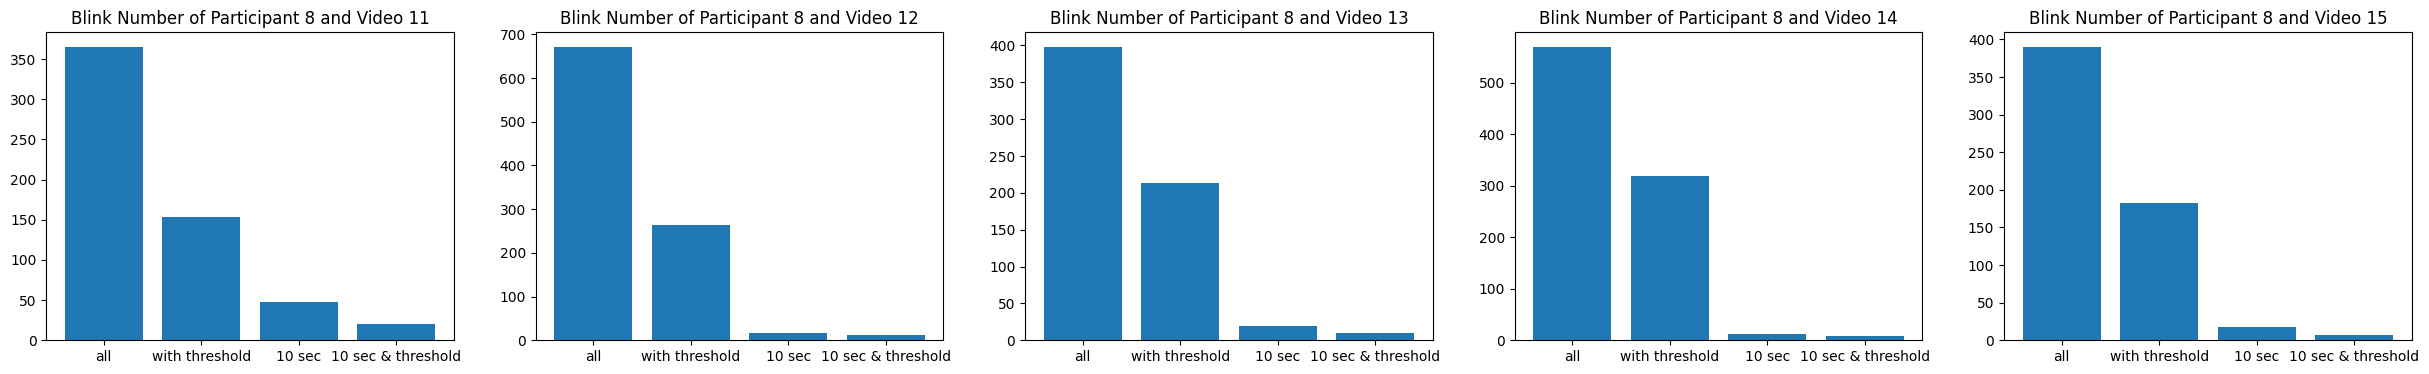

In [19]:
### Versuchsperson 8
plt.figure(1, figsize=(100,4))
for i in range(1,6):
    plt.subplot(1,16,i)
    blinks = ["all", "with threshold", "10 sec","10 sec & threshold"]
    data = blinks_left_eye_all_participants.loc[(blinks_left_eye_all_participants["Participant"] == 8) & (blinks_left_eye_all_participants.index == "vid" + str(i)), 
    ["Blink Number whole dataframe", "Blink Number with threshold", "Blink Number last 10 sec","Blinks of last 10 sec per video and threshold"]].values[0]
    plt.bar(x = blinks, height = data)
    plt.title("Blink Number of Participant 2 and Video " + str(i))

plt.show()
plt.figure(1, figsize=(100,4))
for i in range(6,11):
    plt.subplot(1,16,i)
    blinks = ["all", "with threshold", "10 sec","10 sec & threshold"]
    data = blinks_left_eye_all_participants.loc[(blinks_left_eye_all_participants["Participant"] == 8) & (blinks_left_eye_all_participants.index == "vid" + str(i)), 
    ["Blink Number whole dataframe", "Blink Number with threshold", "Blink Number last 10 sec","Blinks of last 10 sec per video and threshold"]].values[0]
    plt.bar(x = blinks, height = data)
    plt.title("Blink Number of Participant 2 and Video " + str(i))

plt.show()

plt.figure(1, figsize=(100,4))
for i in range(11,16):
    plt.subplot(1,16,i)
    blinks = ["all", "with threshold", "10 sec","10 sec & threshold"]
    data = blinks_left_eye_all_participants.loc[(blinks_left_eye_all_participants["Participant"] == 8) & (blinks_left_eye_all_participants.index == "vid" + str(i)), 
    ["Blink Number whole dataframe", "Blink Number with threshold", "Blink Number last 10 sec","Blinks of last 10 sec per video and threshold"]].values[0]
    plt.bar(x = blinks, height = data)
    plt.title("Blink Number of Participant 8 and Video " + str(i))
plt.show()

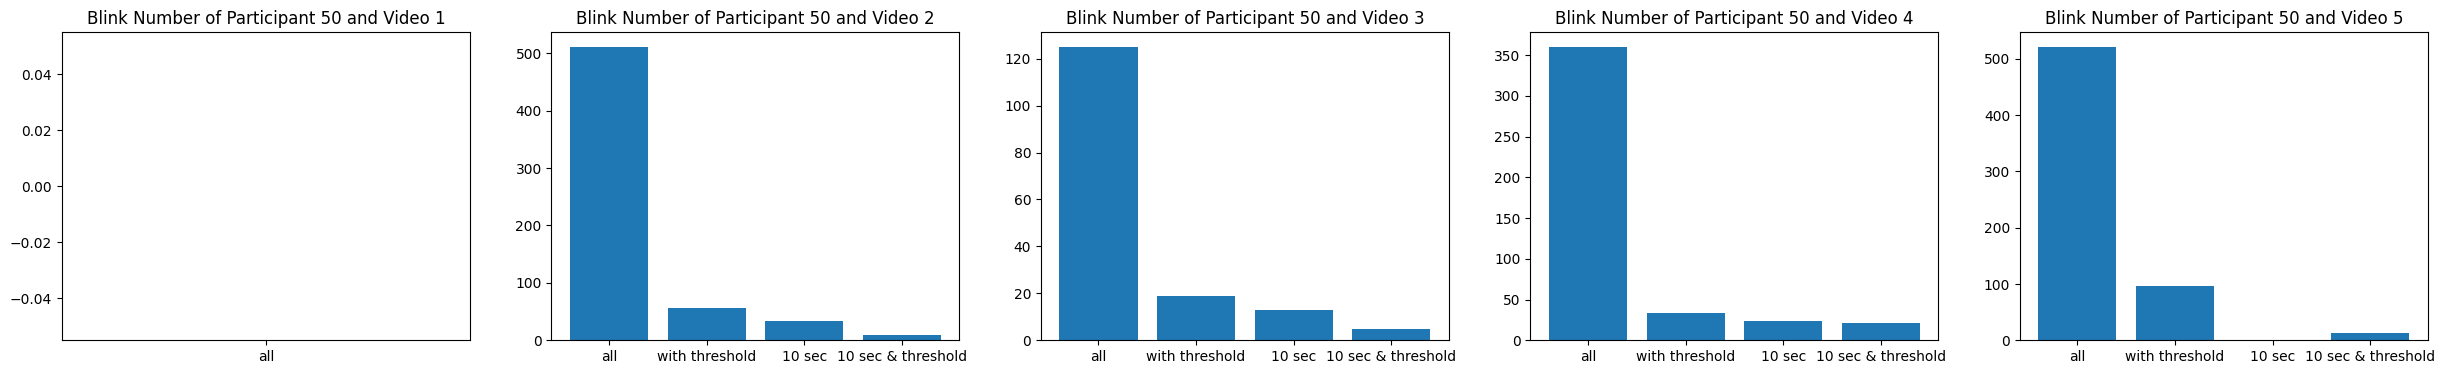

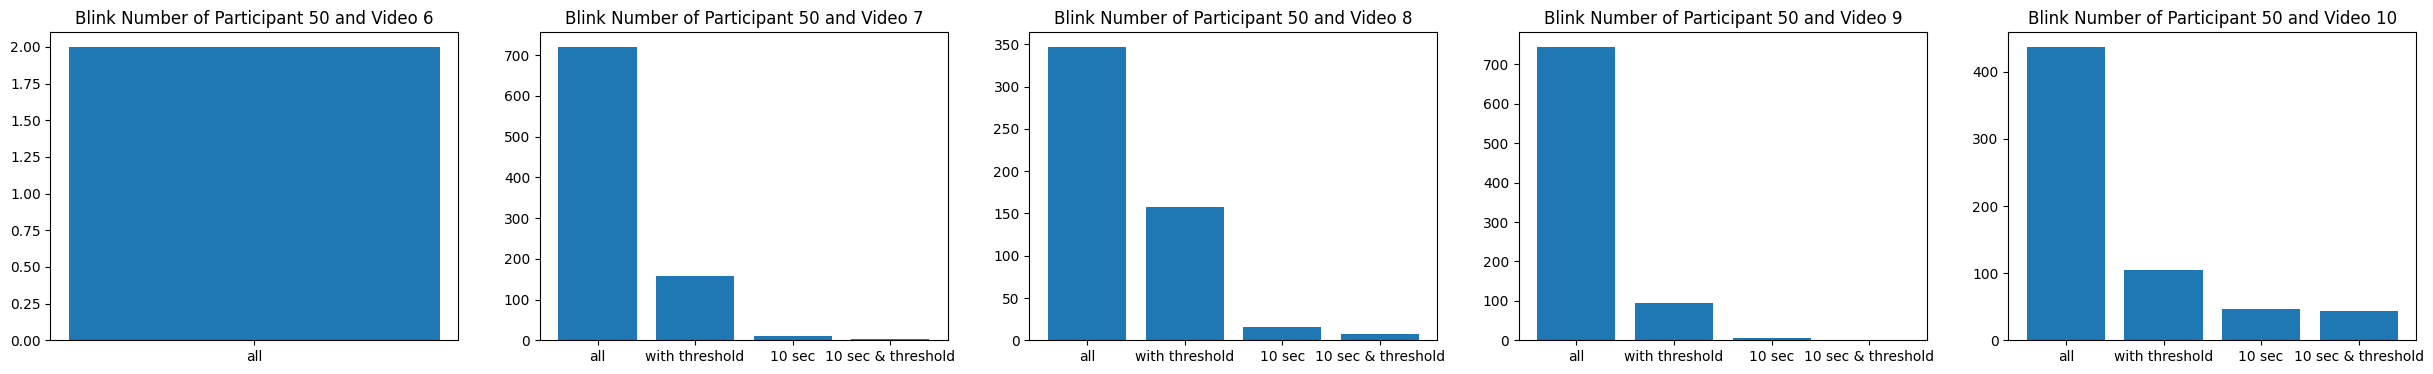

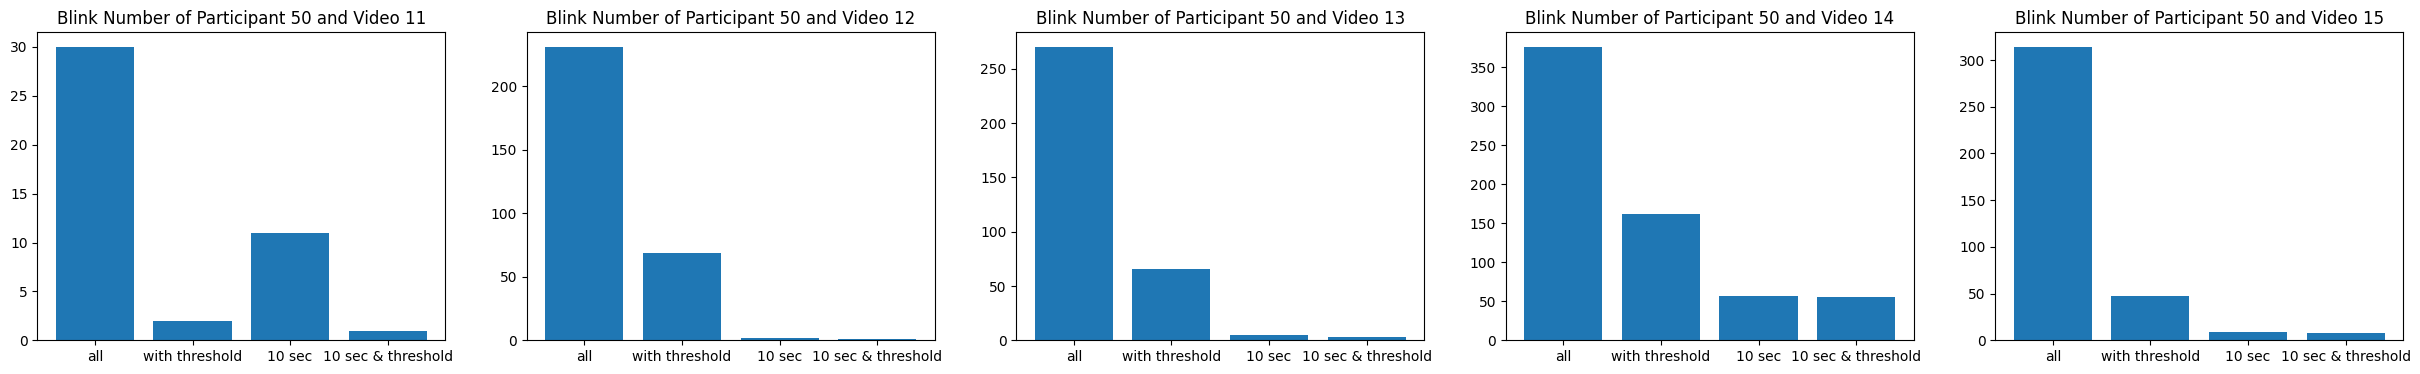

In [20]:
### Versuchsperson 8
vp = 50
plt.figure(1, figsize=(100,4))
for i in range(1,6):
    plt.subplot(1,16,i)
    blinks = ["all", "with threshold", "10 sec","10 sec & threshold"]
    data = blinks_left_eye_all_participants.loc[(blinks_left_eye_all_participants["Participant"] == vp) & (blinks_left_eye_all_participants.index == "vid" + str(i)), 
    ["Blink Number whole dataframe", "Blink Number with threshold", "Blink Number last 10 sec","Blinks of last 10 sec per video and threshold"]].values[0]
    plt.bar(x = blinks, height = data)
    plt.title("Blink Number of Participant " + str(vp) +" and Video " + str(i))

plt.show()
plt.figure(1, figsize=(100,4))
for i in range(6,11):
    plt.subplot(1,16,i)
    blinks = ["all", "with threshold", "10 sec","10 sec & threshold"]
    data = blinks_left_eye_all_participants.loc[(blinks_left_eye_all_participants["Participant"] == vp) & (blinks_left_eye_all_participants.index == "vid" + str(i)), 
    ["Blink Number whole dataframe", "Blink Number with threshold", "Blink Number last 10 sec","Blinks of last 10 sec per video and threshold"]].values[0]
    plt.bar(x = blinks, height = data)
    plt.title("Blink Number of Participant " + str(vp) +" and Video " + str(i))

plt.show()

plt.figure(1, figsize=(100,4))
for i in range(11,16):
    plt.subplot(1,16,i)
    blinks = ["all", "with threshold", "10 sec","10 sec & threshold"]
    data = blinks_left_eye_all_participants.loc[(blinks_left_eye_all_participants["Participant"] == vp) & (blinks_left_eye_all_participants.index == "vid" + str(i)), 
    ["Blink Number whole dataframe", "Blink Number with threshold", "Blink Number last 10 sec","Blinks of last 10 sec per video and threshold"]].values[0]
    plt.bar(x = blinks, height = data)
    plt.title("Blink Number of Participant " + str(vp) +" and Video " + str(i))
plt.show()

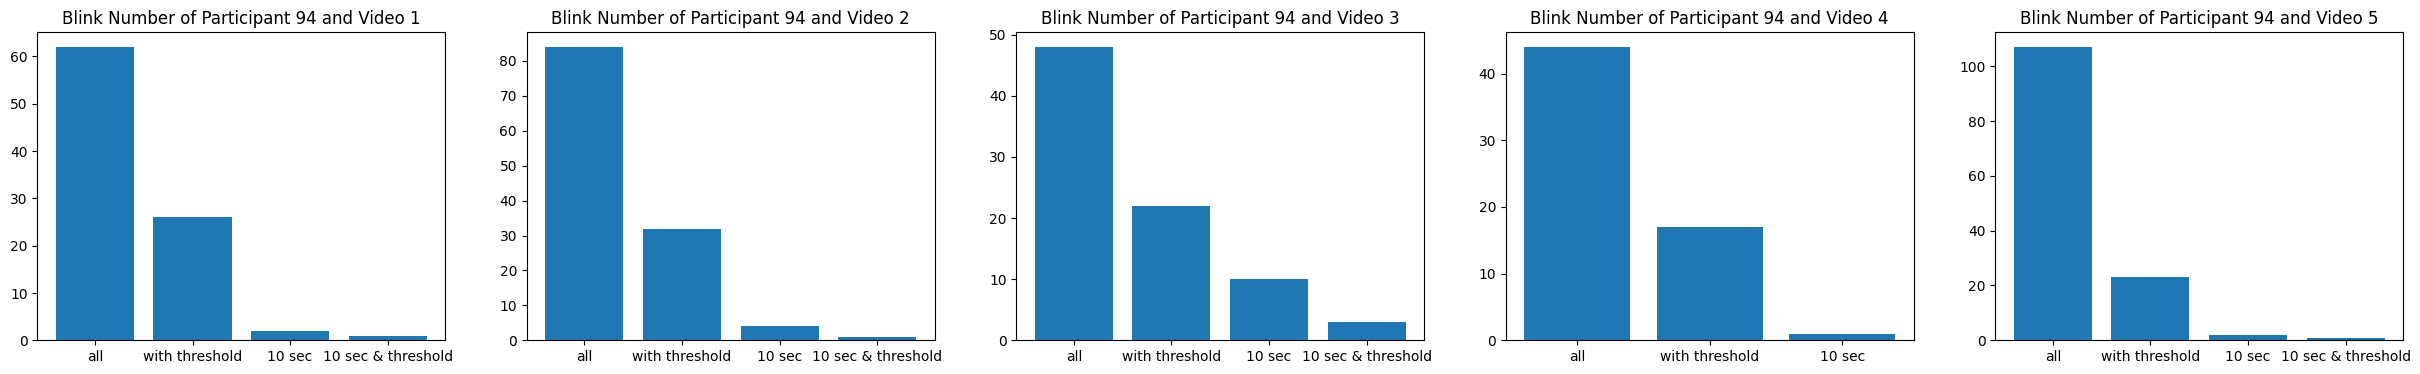

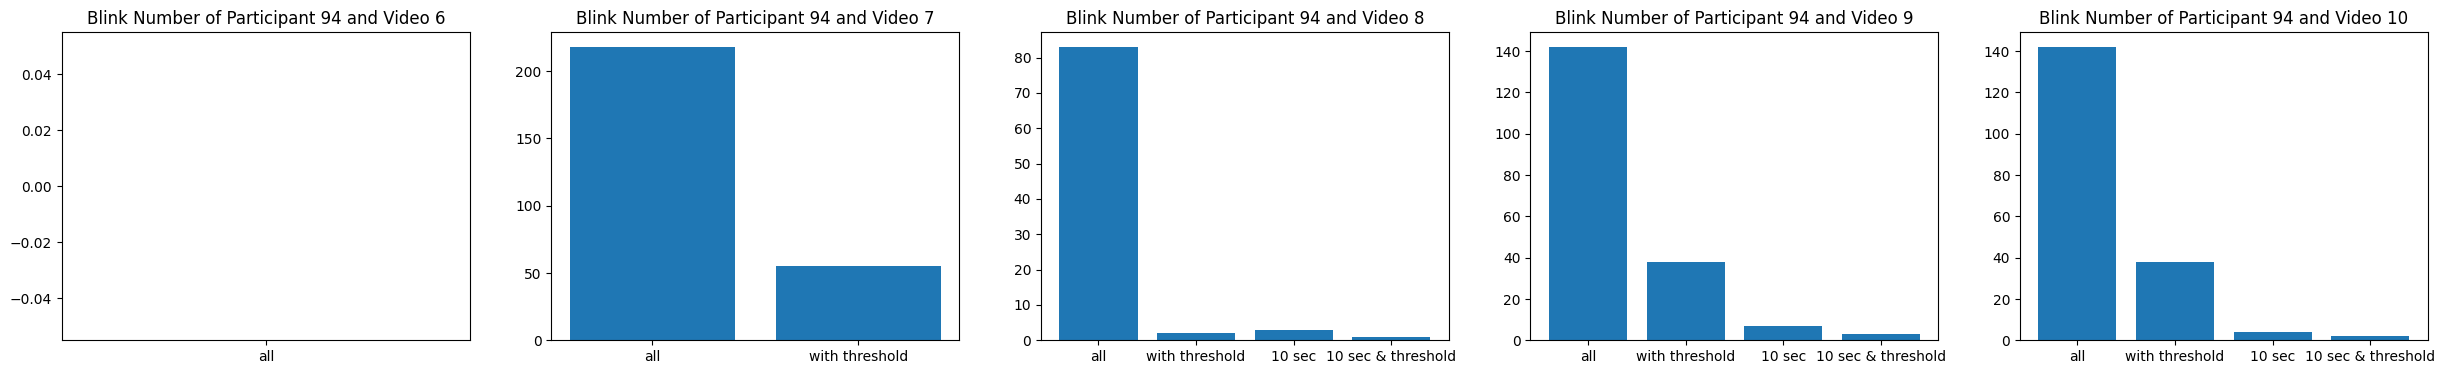

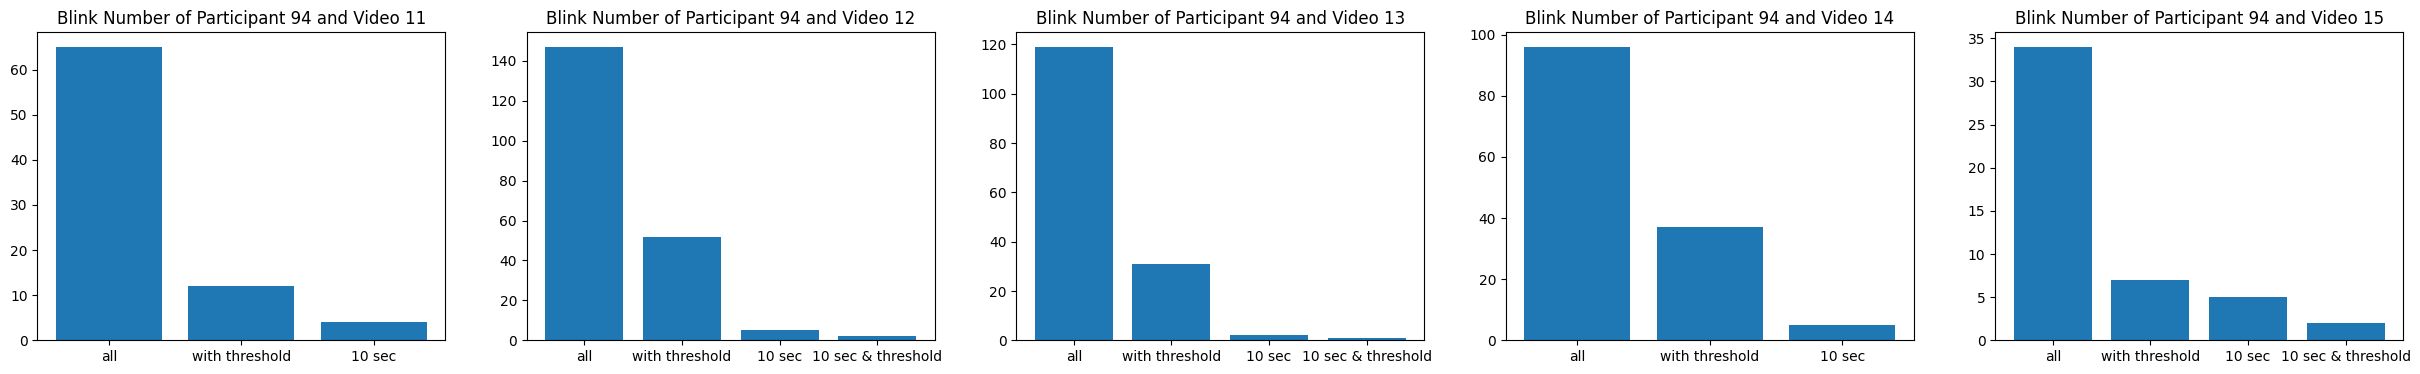

In [21]:
### Versuchsperson 8
vp = 94
plt.figure(1, figsize=(100,4))
for i in range(1,6):
    plt.subplot(1,16,i)
    blinks = ["all", "with threshold", "10 sec","10 sec & threshold"]
    data = blinks_left_eye_all_participants.loc[(blinks_left_eye_all_participants["Participant"] == vp) & (blinks_left_eye_all_participants.index == "vid" + str(i)), 
    ["Blink Number whole dataframe", "Blink Number with threshold", "Blink Number last 10 sec","Blinks of last 10 sec per video and threshold"]].values[0]
    plt.bar(x = blinks, height = data)
    plt.title("Blink Number of Participant " + str(vp) +" and Video " + str(i))

plt.show()
plt.figure(1, figsize=(100,4))
for i in range(6,11):
    plt.subplot(1,16,i)
    blinks = ["all", "with threshold", "10 sec","10 sec & threshold"]
    data = blinks_left_eye_all_participants.loc[(blinks_left_eye_all_participants["Participant"] == vp) & (blinks_left_eye_all_participants.index == "vid" + str(i)), 
    ["Blink Number whole dataframe", "Blink Number with threshold", "Blink Number last 10 sec","Blinks of last 10 sec per video and threshold"]].values[0]
    plt.bar(x = blinks, height = data)
    plt.title("Blink Number of Participant " + str(vp) +" and Video " + str(i))

plt.show()

plt.figure(1, figsize=(100,4))
for i in range(11,16):
    plt.subplot(1,16,i)
    blinks = ["all", "with threshold", "10 sec","10 sec & threshold"]
    data = blinks_left_eye_all_participants.loc[(blinks_left_eye_all_participants["Participant"] == vp) & (blinks_left_eye_all_participants.index == "vid" + str(i)), 
    ["Blink Number whole dataframe", "Blink Number with threshold", "Blink Number last 10 sec","Blinks of last 10 sec per video and threshold"]].values[0]
    plt.bar(x = blinks, height = data)
    plt.title("Blink Number of Participant " + str(vp) +" and Video " + str(i))
plt.show()

In [22]:
## len 14:vp 8,11,13,25, 47, 49, 52, 53, 54, 68,70,71, 87, 93,
## len 13:56 (len 13),  59 (len13),63 (len13), 
## len 12:83(len 12),
## len 11:94 (len 11), 
## len 9:50 (len 9),
## file not found: 89(file not found),96 (file not found)
## key error vid1: 82 

In [24]:
data = {"Blink Number whole dataframe": [10,25,30],
	"Blink Number with threshold" :[np.nan, 20, 30,],
    "Blink Number last 10 sec": [4, 5, 6],
    "Blinks of last 10 sec per video and threshold":[1,2,3],
    "Participant": [1,2,3]}

df_plot = pd.DataFrame(data)

<BarContainer object of 16 artists>

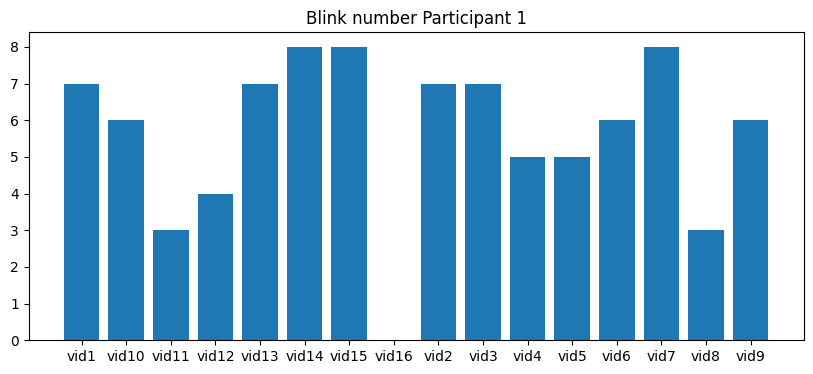

In [43]:
plt.figure(1, figsize=(10,4))
vp  = 1
videos = ["vid1","vid10","vid11","vid12","vid13","vid14","vid15","vid16","vid2","vid3","vid4","vid5","vid6","vid7","vid8","vid9"]
blinks = blinks_left_eye_all_participants["Blinks of last 10 sec per video and threshold"].loc[blinks_left_eye_all_participants["Participant"] == vp]
plt.title("Blink number Participant "+ str(vp))
plt.bar(videos, height = blinks)

<function matplotlib.pyplot.show(close=None, block=None)>

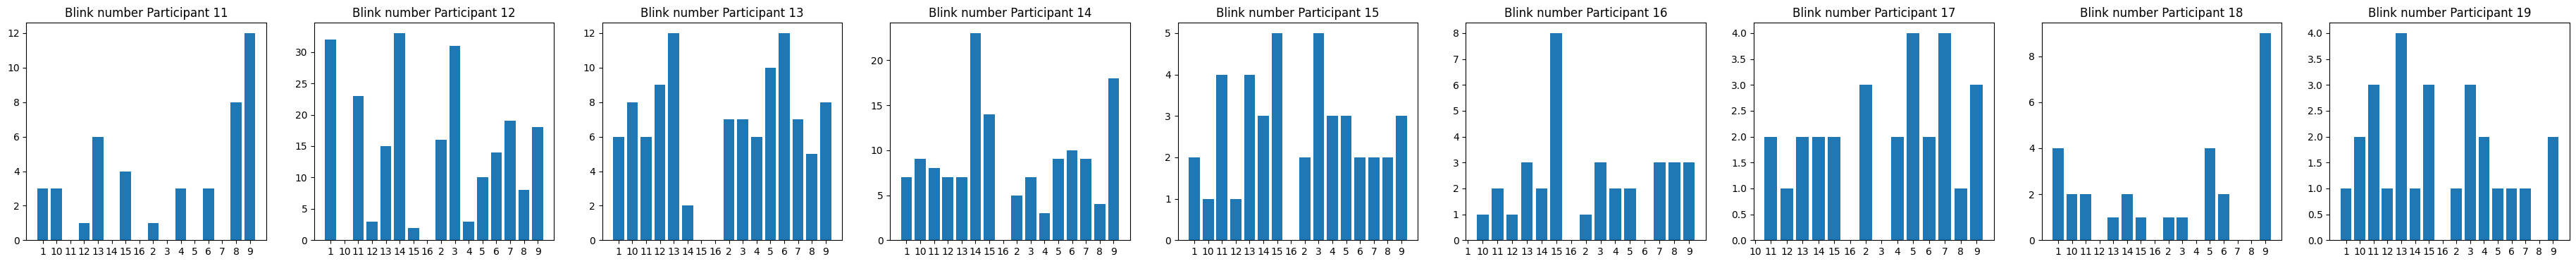

In [81]:
plt.figure(1, figsize=(500,4))
list = [1,2,3,5,6]
list2 = range(11,20)
for vp in list2:
    plt.subplot(1,95,vp)
    videos = ["1","10","11","12","13","14","15","16","2","3","4","5","6","7","8","9"]
   # ["vid1","vid10","vid11","vid12","vid13","vid14","vid15","vid16","vid2","vid3","vid4","vid5","vid6","vid7","vid8","vid9"]
    blinks = blinks_left_eye_all_participants["Blinks of last 10 sec per video and threshold"].loc[blinks_left_eye_all_participants["Participant"] == vp]
    plt.title("Blink number Participant "+ str(vp))
    plt.bar(videos, height = blinks)

plt.show

# VP2: 1,11,12,13,2,8,9
# VP3: 7
# VP4: 1,4,9
# VP5 13
# VP6: 1,13,3,4
# VP8: 6
# VP9: 4
# VP10: 11
# VP11: 11,14,3,5,7
# VP12: 10
# VP16, 6
# VP17: 3
# VP18: 12,4,7,8
# VP19: 8
# passt: VP1, VP7, VP13, VP 14, VP15, 

<AxesSubplot: >

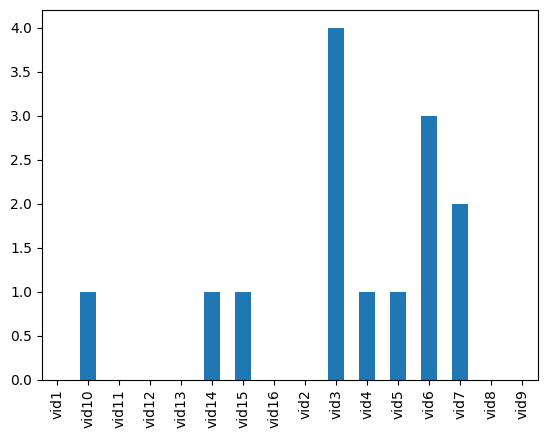

In [90]:
blinks_left_eye_all_participants["Blinks of last 10 sec per video and threshold"].loc[blinks_left_eye_all_participants["Participant"] == 2].plot(kind = "bar")


<AxesSubplot: >

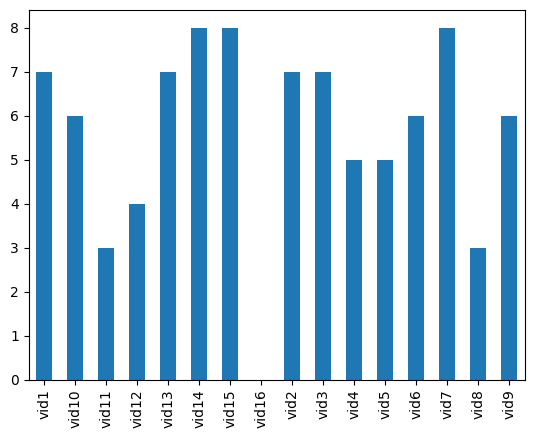

In [25]:
blinks_left_eye_all_participants["Blinks of last 10 sec per video and threshold"].loc[blinks_left_eye_all_participants["Participant"] == 1].plot(kind = "bar")

<Figure size 10000x400 with 0 Axes>

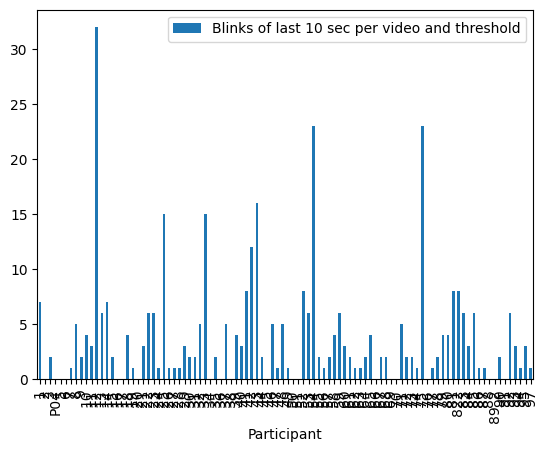

In [26]:

plt.figure(1, figsize=(100,4))
blinks_left_eye_all_participants.loc["vid1"].plot(x = "Participant", y = "Blinks of last 10 sec per video and threshold", kind = "bar")
plt.show()

<AxesSubplot: xlabel='Participant'>

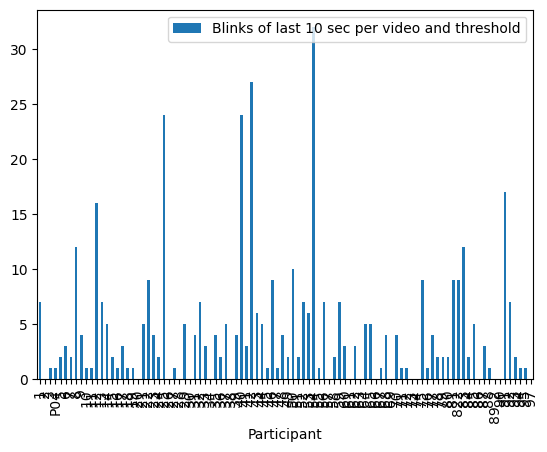

In [27]:
blinks_left_eye_all_participants.loc["vid2"].plot(x = "Participant", y = "Blinks of last 10 sec per video and threshold", kind = "bar")
# sortieren

<AxesSubplot: xlabel='Participant'>

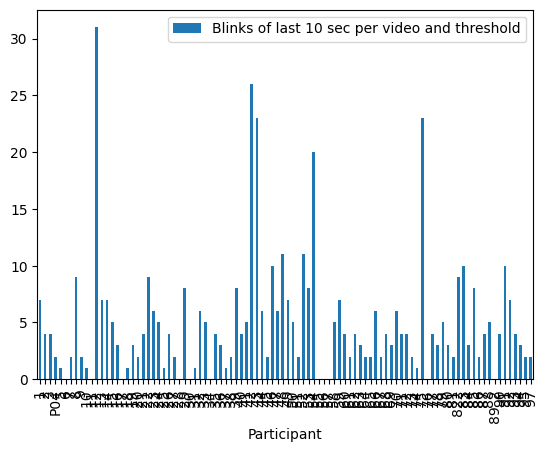

In [ ]:
blinks_left_eye_all_participants.loc["vid3"].plot(x = "Participant", y = "Blinks of last 10 sec per video and threshold", kind = "bar")

<AxesSubplot: xlabel='Participant'>

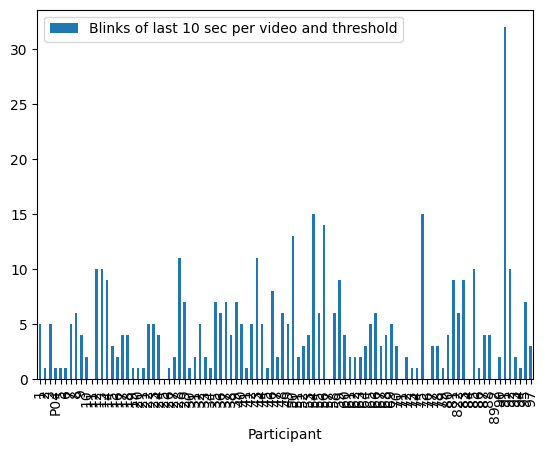

In [ ]:
blinks_left_eye_all_participants.loc["vid5"].plot(x = "Participant", y = "Blinks of last 10 sec per video and threshold", kind = "bar")

<AxesSubplot: xlabel='Participant'>

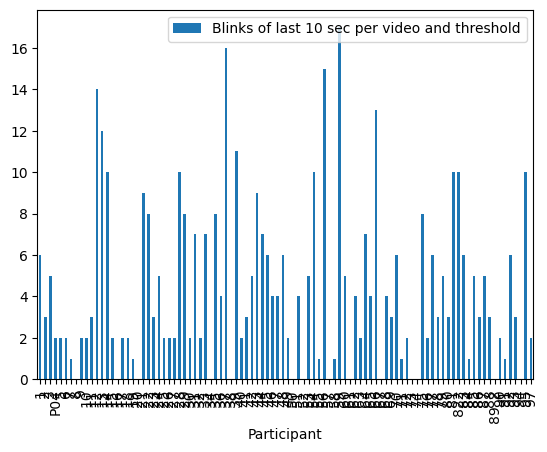

In [ ]:
blinks_left_eye_all_participants.loc["vid6"].plot(x = "Participant", y = "Blinks of last 10 sec per video and threshold", kind = "bar")

<AxesSubplot: xlabel='Participant'>

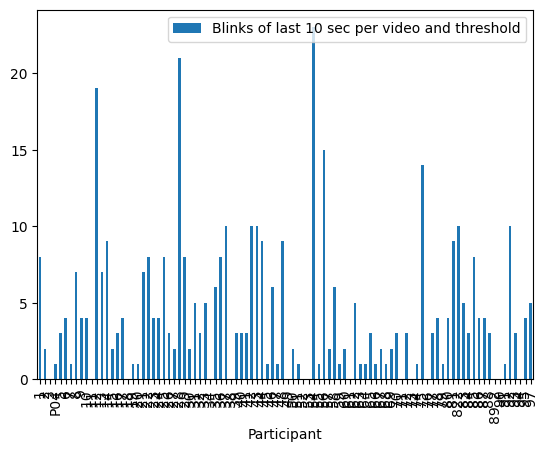

In [ ]:
blinks_left_eye_all_participants.loc["vid7"].plot(x = "Participant", y = "Blinks of last 10 sec per video and threshold", kind = "bar")


<AxesSubplot: xlabel='Participant'>

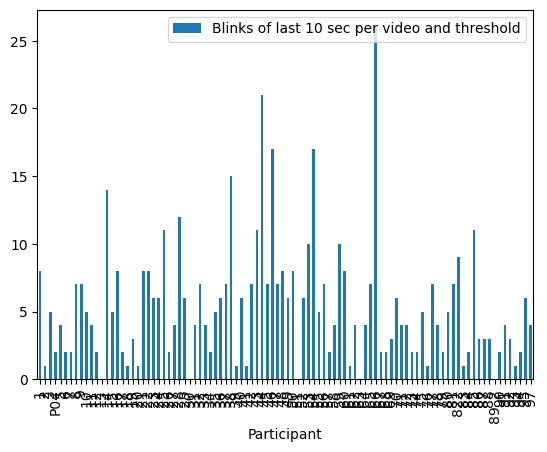

In [ ]:
blinks_left_eye_all_participants.loc["vid15"].plot(x = "Participant", y = "Blinks of last 10 sec per video and threshold", kind = "bar")
